In [1]:
import os
import cv2
import tensorflow
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm

from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

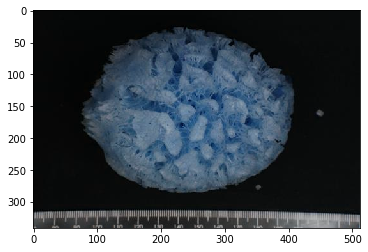

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os

base_dir = '/home/tech-iguana/Documents/facial_stuff/marinechallenge/train_small'

CATEGORIES = ["Mycale_anisochela", "Mursia_cristiata",  "Munida_benguela", "Miersiograpsus_kingsleyi", "Merhippolyte_agulhasensis", "Mediaster_bairdi_capensis",  "Marthasterias_africana", "Marginella_musica", "Ascidiacea", "Armina_sp_", "Aristeus_varidens", "Aphrodita_alta", "Aphelodoris_sp_","Anthoptilum_grandiflorum", "Amalda_bullioides", "Alcyonacea", "Africolaria_rutila", "Aequorea_spp", "Actinostola_capensis", "Actinoscyphia_plebeia", "Actinoptilum_molle", "Actiniaria", "Cheiraster_hirsutus", "Cheilostomatida",  "Charonia_lampas", "Ceramaster_patagonicus_euryplax", "Cephalodiscus_gilchristi", "Cavernularia_spp",  "Ophiura_trimeni", "Ophiura_costata_costata", "Brissopsis_lyrifera_capensis", "Bolocera_kerguelensis", "Ophiothrix_fragilis", "Athleta_lutosa", "Ophiothrix_aristulata","Athleta_abyssicola", "Ophiomyxa_vivipara_capensis", "Nudibranchia", "Astropecten_irregularis_pontoporeus", "Neptuneopsis_gilchristi", "Neopilumnoplax_heterochir", "Neolithodes_asperrimus", "Nassarius_vinctus", "Nassarius speciosus",  "Polychaete_tubes_(only)", "Pleurobranchaea_bubala",  "Plesionika_martia", "Cosmasterias_felipes", "Comitas_stolida", "Comitas_saldanhae",  "Comanthus_wahlbergii", "Phormosoma_placenta_africana", "Philinopsis_capensis", "Perissasterias_polyacantha", "Philine_aperta","Pelagia_noctiluca", "Pecten_sulcicostatus", "Pasiphaea_sp._2", "Pasiphaea_sp._1", "Chrysaora_spp", "Parapagurus_bouvieri", "Pagurus_cuanensis", "Chrysaora_fulgida", "Chondraster_elattosis", "Fusinus_africanae", "Psilaster_acuminatus",  "Pseudostichopus_langeae", "Funchalia_woodwardi", "Pseudodromia_spp_", "Flabellum_(Ulocyathus)_messum",  "Pseudodromia_rotunda", "Exodromidia_spinosissima", "Pseudarchaster_tessellatus", "Exodromidia_spinosa", "Pseudarchaster_brachyactis", "Projasus_parkeri", "Poraniopsis_echinaster","Eleutherobia_variable", "Eleutherobia_variable", "Prawns", "Porifera", "Dipsacaster_sladeni_capensis", "Diplopteraster_multipes", "Polyechinus_agulhensis", "Cypraeovula_iutsui", "Polychaete_worms", "Luidia_sarsii_africana", "Lophaster_quadrispinus",  "Vitjazmaia_latidactyla", "Turritella_declivis", "Lithodes_ferox", "Triviella_spp_",  "Limopsis_chuni", "Lamellaria_Coriocella_spp", "Toraster_tuberculatus", "Terebratulina_sp_", "Kaloplocamus_ramosus", "Isopods", "Isididae","Sympagurus_dimorphus", "Suberites_dandelenae", "Inachidae", "Hydrozoa_spp", "Stylasteridae", "Holothuroidea", "Stereomastis_sculpta", "Hippasteria_phrygiana", "Spatangus_capensis", "Hermit_crab", "Solenocera_africana",  "Seafan", "Henricia_abyssalis", "Hemiocnus_insolens", "Salpa_spp_",  "Gynandrocarpa_placenta", "Scleractinia", "Haliporoides_triarthrus", "Halcurias_capensis", "Scaphander_punctostriatus", "Rossella_antarctica", "Granulifusus_rubrolineatus","Rochinia_hertwigi", "Goneplax_clevai", "Glyphocrangon_spp", "Pyromaia_tuberculata", "Pycnogonid_spp_", "Fusivoluta_pyrrhostoma", "Fusitriton_magellanicus", "Pterygosquilla_capensis", "Pteraster_capensis"]


for category in CATEGORIES:
    path = os.path.join(base_dir, category) #with the iterator named cartegory we are able to loop over files of diffrent categoried.
    for img in os.listdir(path):  # gets the images of diffrent people store in diffrent folders
        img_array = cv2.imread(os.path.join(path,img))  # convert to array cv.CV_BGR2GRAY
        #plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY))  # shows the image in a scale ##, cmap='gray'
        plt.imshow(img_array)
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [9]:
print(img_array.shape)

(341, 512, 3)


#### Resizing the images

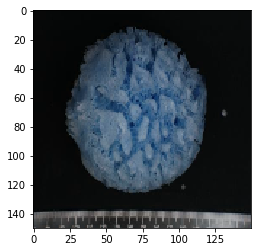

In [10]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)) ## COLOR_BGR2RGB ## cmap='gray'
plt.imshow(new_array)
plt.show()

#### creating training data

In [11]:
training_data = []  

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(base_dir, category)  # create path to diffrent folders of diffrent people that we want to use for the training set
        class_num = CATEGORIES.index(category)  # get an index for each cartegory
        for img in tqdm(os.listdir(path)):  # iterate over each images of diffrent people in diffrent folders
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array   #,cv2.IMREAD_GRAYSCALE
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|██████████| 38/38 [00:00<00:00, 174.24it/s]

2998


In [12]:
import random

random.shuffle(training_data)

In [13]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X)
y = np.array(y)


In [14]:
X.shape

(2998, 150, 150, 3)

In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

#### Tranfer Learning using vgg16

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16

#img_height = img_width = 100 
#channels = 3


#datagen = ImageDataGenerator(rescale=1.0/255)
model = VGG16(weights='imagenet', include_top = False, input_shape = (150, 150, 3))           

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

Using TensorFlow backend.


In [19]:
# CREATE A "REAL" MODEL FROM VGG16
# BY COPYING ALL THE LAYERS OF VGG16
new_model = tensorflow.keras.Sequential()
for l in model.layers:
    model.trainable = False
    new_model.add(l)


In [20]:
new_model.add(Flatten())
new_model.add(Dense(256, activation='relu'))
new_model.add(Dense(137, activation='softmax'))

In [21]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       2

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [23]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=100,
    class_mode='categorical'
)

Found 3111 images belonging to 137 classes.


In [24]:
for data_batch, labels_batch in train_generator:

    print('data batch shape:', data_batch.shape)

    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 137)


In [25]:
new_model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [26]:
history = new_model.fit_generator(
        train_generator,
        steps_per_epoch=30,
        epochs=15
        #validation_steps=50
)

Epoch 1/15
20/20 [==============================] - 320s 16s/step - loss: 5.1285 - accuracy: 0.0406
Epoch 2/15
20/20 [==============================] - 311s 16s/step - loss: 4.5807 - accuracy: 0.0812
Epoch 3/15
20/20 [==============================] - 302s 15s/step - loss: 4.3357 - accuracy: 0.1089
Epoch 4/15
20/20 [==============================] - 317s 16s/step - loss: 4.0906 - accuracy: 0.1328
Epoch 5/15
20/20 [==============================] - 307s 15s/step - loss: 3.8339 - accuracy: 0.1734
Epoch 6/15
20/20 [==============================] - 292s 15s/step - loss: 3.5496 - accuracy: 0.1870
Epoch 7/15
20/20 [==============================] - 306s 15s/step - loss: 3.3120 - accuracy: 0.2703
Epoch 8/15
20/20 [==============================] - 326s 16s/step - loss: 3.1665 - accuracy: 0.2719
Epoch 9/15
20/20 [==============================] - 309s 15s/step - loss: 3.0910 - accuracy: 0.2984
Epoch 10/15
20/20 [==============================] - 309s 15s/step - loss: 2.7467 - accuracy: 0.3281

In [27]:
 new_model.save_weights('marineveterbratemodel')

#### Results in a graph

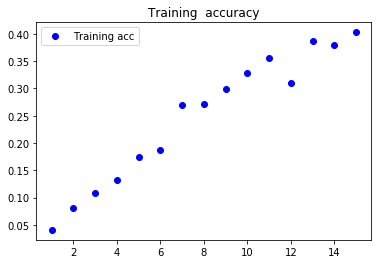

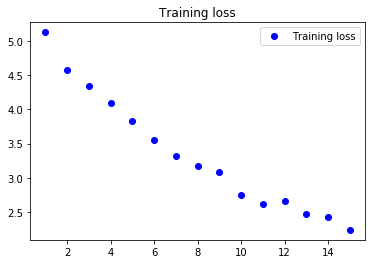

In [29]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training  accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.legend()
plt.show()

#### Preparing training data

In [ ]:
train_dir = '/home/tech-iguana/Documents/facial_stuff/marinechallenge/test_small'
